In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

68.89834176200537 -5.810804323921559
27.139966778052624 72.38358563713413
69.90730782115531 -10.807485561184109
37.83947362905805 -17.65951812703642
32.00935541341512 -107.82536071184191
0.47328853555846706 -110.83209283754024
77.68386578603702 -74.69402080541936
-27.34012320524282 15.66754756465565
-48.646357541450215 42.552115240967765
46.61536021174129 -167.5231054984767
-12.62407754531911 -177.84870433670486
-20.590060791332647 60.62011972082166
-51.78295859560004 -33.853639745488664
-19.691061660061962 131.26631635733253
-29.890725974273387 26.849799149536466
26.18323916952845 18.089103473087732
42.66887883689054 -132.96394482849098
-49.570900881345345 -33.13480734953288
39.65756203163582 -18.907253079893593
-36.69777835153377 3.0540232555588886
-43.691105208559 -134.79230556239466
-4.493537180253895 -120.20581372866152
80.09509548957845 35.407280616640634
-72.98002720904157 3.189051149587044
24.318438094457107 8.171226628779834
82.68722473188836 40.67327266093679
-11.009953945809

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

klaksvik fo
phalodi in
hofn is
camacha pt
deming us
ixtapa mx
qaanaaq gl
luderitz na
east london za
bethel us
vaitupu wf
grand river south east mu
chuy uy
kununurra au
mafeteng ls
waddan ly
north bend us
chuy uy
vila franca do campo pt
saldanha za
rikitea pf
atuona pf
vardo no
hermanus za
gat ly
tumannyy ru
san cristobal ec
hovd mn
butaritari ki
san patricio mx
blenheim ca
taolanaro mg
magomeni tz
bluff nz
esperance au
vao nc
rikitea pf
puerto ayora ec
nchelenge zm
chokurdakh ru
bambanglipuro id
khatanga ru
ushuaia ar
barraute ca
yeniseysk ru
punta arenas cl
hermanus za
hermanus za
pueblo nuevo mx
hilo us
lata sb
blackwater au
saint anthony ca
monrovia lr
yunjinghong cn
hilo us
valdivia cl
barrow us
busselton au
rikitea pf
viransehir tr
saldanha za
atuona pf
honiara sb
wuwei cn
abu dhabi ae
port alfred za
miracema do tocantins br
salalah om
kruisfontein za
rikitea pf
rikitea pf
vao nc
mataura pf
sangmelima cm
marcona pe
kapaa us
chiclana es
lerwick gb
albany au
klaksvik fo
taolanaro mg

rikitea pf
jamestown sh
saint george bm
grand river south east mu
panaba mx
albany au
tuktoyaktuk ca
atuona pf
atuona pf
ushuaia ar
narsaq gl
grand gaube mu
sentyabrskiy ru
te anau nz
cermik tr
port elizabeth za
walvis bay na
ushuaia ar
port hedland au
hamilton bm
vostok ru
barrow us
tiksi ru
rongcheng cn
ushuaia ar
torbay ca
saskylakh ru
kodiak us
rikitea pf
tasiilaq gl
busselton au
qaanaaq gl
taolanaro mg
tuktoyaktuk ca
noumea nc
cantaura ve
gizo sb
bredasdorp za
whitecourt ca
caluquembe ao
svetlogorsk ru
ewo cg
kondoa tz
albany au
correntina br
hobart au
asfi ma
mataura pf
punta arenas cl
dikson ru
praia da vitoria pt
kavaratti in
tuatapere nz
east london za
ushuaia ar
afzalgarh in
mataura pf
ushuaia ar
ushuaia ar
hilo us
kaitangata nz
marsciano it
carnarvon au
kenai us
moyale et
sigli id
busselton au
atuona pf
tumannyy ru
nizhneyansk ru
umzimvubu za
belushya guba ru
manzhouli cn
sao luiz gonzaga br
tuatapere nz
tete mz
sananduva br
hobart au
port hedland au
albany au
pisco pe
ouadd

airai pw
bonavista ca
provideniya ru
le port re
port hardy ca
hervey bay au
progreso mx
illoqqortoormiut gl


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | phalodi
Processing Record 3 of Set 1 | hofn
Processing Record 4 of Set 1 | camacha
Processing Record 5 of Set 1 | deming
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | mafeteng
Processing Record 16 of Set 1 | waddan
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | atuona
Processing Record 22 of

Processing Record 37 of Set 4 | ostrovnoy
Processing Record 38 of Set 4 | hirara
Processing Record 39 of Set 4 | aasiaat
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | rungata
City not found. Skipping...
Processing Record 42 of Set 4 | umea
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | saint combs
City not found. Skipping...
Processing Record 46 of Set 4 | jablah
Processing Record 47 of Set 4 | ambulu
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | selikhino
Processing Record 50 of Set 4 | betsiamites
Processing Record 1 of Set 5 | bealanana
Processing Record 2 of Set 5 | tilichiki
Processing Record 3 of Set 5 | dikson
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | orlik
Processing Record 6 of Set 5 | mercedes
Processing Record 7 of Set 5 | paralia
Processing Record 8 of Set 5 | moose factory
Processing Record 9 of Set 5 | dharmavaram
P

Processing Record 25 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 26 of Set 8 | te anau
Processing Record 27 of Set 8 | cermik
Processing Record 28 of Set 8 | walvis bay
Processing Record 29 of Set 8 | port hedland
Processing Record 30 of Set 8 | hamilton
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | rongcheng
Processing Record 33 of Set 8 | noumea
Processing Record 34 of Set 8 | cantaura
Processing Record 35 of Set 8 | gizo
Processing Record 36 of Set 8 | whitecourt
Processing Record 37 of Set 8 | caluquembe
Processing Record 38 of Set 8 | svetlogorsk
Processing Record 39 of Set 8 | ewo
Processing Record 40 of Set 8 | kondoa
Processing Record 41 of Set 8 | correntina
Processing Record 42 of Set 8 | asfi
Processing Record 43 of Set 8 | praia da vitoria
Processing Record 44 of Set 8 | afzalgarh
Processing Record 45 of Set 8 | marsciano
Processing Record 46 of Set 8 | carnarvon
Processing Record 47 of Set 8 | kenai
Processing Record 48 of

Processing Record 15 of Set 12 | mandalgovi
Processing Record 16 of Set 12 | puerto madryn
Processing Record 17 of Set 12 | baihar
Processing Record 18 of Set 12 | algiers
Processing Record 19 of Set 12 | bereznik
Processing Record 20 of Set 12 | rochefort
Processing Record 21 of Set 12 | namibe
Processing Record 22 of Set 12 | ercis
Processing Record 23 of Set 12 | piet retief
Processing Record 24 of Set 12 | kez
Processing Record 25 of Set 12 | tual
Processing Record 26 of Set 12 | taua
Processing Record 27 of Set 12 | dingle
Processing Record 28 of Set 12 | pasni
Processing Record 29 of Set 12 | antofagasta
Processing Record 30 of Set 12 | aguada de pasajeros
Processing Record 31 of Set 12 | lazaro cardenas
Processing Record 32 of Set 12 | sanandaj
Processing Record 33 of Set 12 | langsa
Processing Record 34 of Set 12 | ciudad bolivar
Processing Record 35 of Set 12 | mrirt
City not found. Skipping...
Processing Record 36 of Set 12 | khasan
Processing Record 37 of Set 12 | tunoshna
P

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,38.32,73,100,15.03,FO,2023-01-11 22:57:59
1,Phalodi,27.1333,72.3667,63.63,30,40,4.68,IN,2023-01-11 22:57:59
2,Hofn,64.2539,-15.2082,33.55,66,97,18.57,IS,2023-01-11 22:58:00
3,Camacha,33.0833,-16.3333,58.42,67,40,13.80,PT,2023-01-11 22:58:00
4,Deming,32.2687,-107.7586,55.92,28,100,21.56,US,2023-01-11 22:58:00
5,Ixtapa,20.7000,-105.2000,77.23,79,1,5.01,MX,2023-01-11 22:58:01
6,Qaanaaq,77.4840,-69.3632,-7.02,92,100,5.95,GL,2023-01-11 22:58:01
7,Luderitz,-26.6481,15.1594,63.50,86,74,10.02,NA,2023-01-11 22:58:01
8,East London,-33.0153,27.9116,74.48,94,70,4.47,ZA,2023-01-11 22:53:02
9,Bethel,41.3712,-73.4140,35.55,64,100,3.56,US,2023-01-11 22:55:42


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
today = time.strftime("%x")
today

'01/11/23'

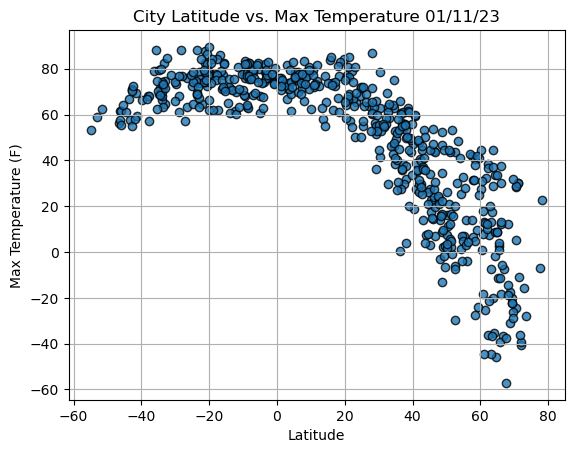

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

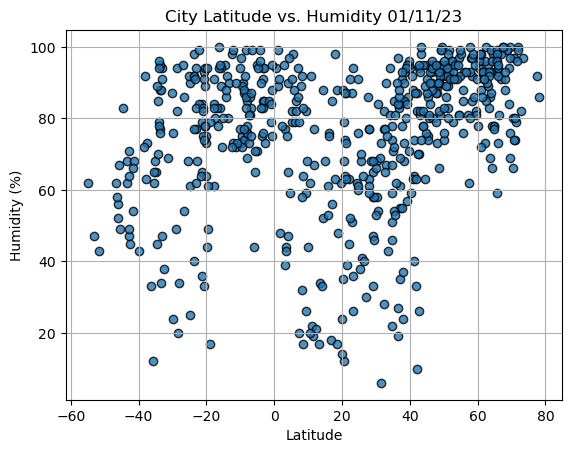

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

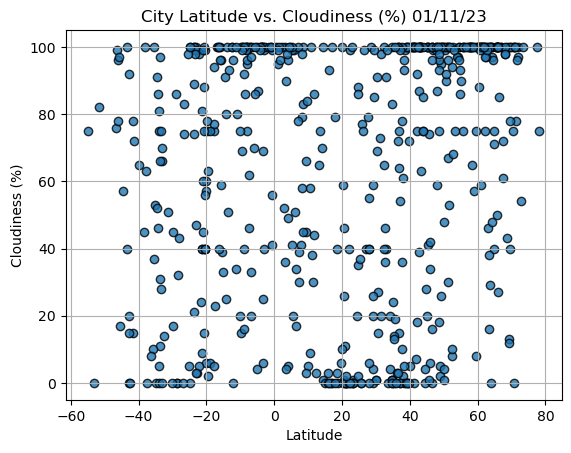

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

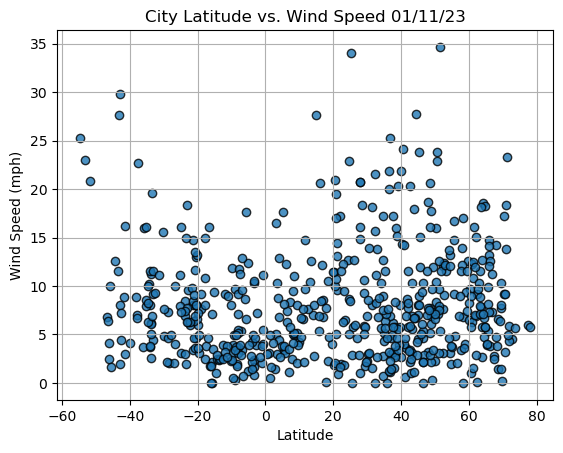

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()